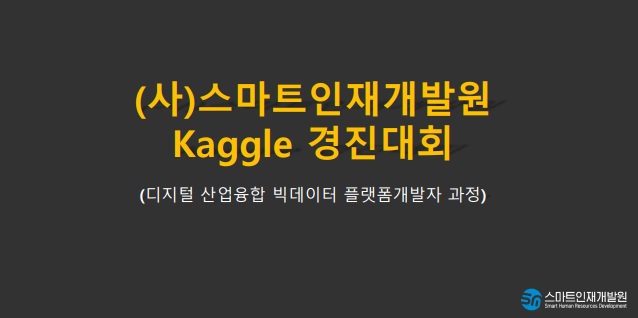

In [2]:
import pandas as pd

train = pd.read_csv('train.csv',index_col='no')
test = pd.read_csv('test.csv',index_col='no')

In [9]:
train

age          workclass  fnlwgt      education  education-num  \
no                                                                    
1       25            Private  219199           11th              7   
2       39            Private   52978   Some-college             10   
3       35            Private  196899      Bachelors             13   
4       64            Private  135527      Assoc-voc             11   
5       24            Private   60783   Some-college             10   
...    ...                ...     ...            ...            ...   
29301   20            Private  100605        HS-grad              9   
29302   21            Private  372636        HS-grad              9   
29303   18   Self-emp-not-inc  258474           10th              6   
29304   33            Private  157446           11th              7   
29305   65                  ?   94809        HS-grad              9   

            marital-status          occupation    relationship  \
no                                                               
1                 Divorced   Machine-op-inspct   Not-in-family   
2                 Divorced       Other-service   Not-in-family   
3            Never-married   Handlers-cleaners   Not-in-family   
4                 Divorced        Tech-support   Not-in-family   
5       Married-civ-spouse    Transport-moving         Husband   
...                    ...                 ...             ...   
29301        Never-married               Sales       Own-child   
29302        Never-married               Sales       Own-child   
29303        Never-married     Farming-fishing       Own-child   
29304        Never-married        Craft-repair   Not-in-family   
29305              Widowed                   ?   Not-in-family   

                      race      sex  capital-gain  capital-loss  \
no                                                                
1                    White     Male             0             0   
2                    White   Female             0          1721   
3       Asian-Pac-Islander   Female             0             0   
4                    White   Female             0             0   
5                    White     Male             0             0   
...                    ...      ...           ...           ...   
29301                Other     Male             0             0   
29302                Black     Male             0             0   
29303                White     Male             0             0   
29304                White     Male             0             0   
29305                White   Female             0             0   

       hours-per-week  native-country  income  
no                                             
1                  40   United-States       0  
2                  55   United-States       0  
3                  50           Haiti       0  
4                  40   United-States       0  
5                  70   United-States       1  
...               ...             ...     ...  
29301              40     Puerto-Rico       0  
29302              40   United-States       0  
29303              40   United-States       0  
29304              65   United-States       0  
29305              40   United-States       0  

[29305 rows x 15 columns]

In [4]:
test

age          workclass  fnlwgt      education  education-num  \
no                                                                    
29306   18                  ?  245274   Some-college             10   
29307   29            Private   83003        HS-grad              9   
29308   45            Private   35136      Bachelors             13   
29309   42   Self-emp-not-inc   64631      Bachelors             13   
29310   41            Private  195821      Doctorate             16   
...    ...                ...     ...            ...            ...   
48838   45   Self-emp-not-inc  116789        HS-grad              9   
48839   48            Private  185079        HS-grad              9   
48840   63            Private  117473   Some-college             10   
48841   18            Private  150817           11th              7   
48842   31            Private  341632     Assoc-acdm             12   

            marital-status        occupation    relationship    race      sex  \
no                                                                              
29306        Never-married                 ?       Own-child   White     Male   
29307   Married-civ-spouse     Other-service            Wife   White   Female   
29308   Married-civ-spouse      Tech-support         Husband   Black     Male   
29309   Married-civ-spouse   Exec-managerial         Husband   White     Male   
29310   Married-civ-spouse   Exec-managerial            Wife   White   Female   
...                    ...               ...             ...     ...      ...   
48838   Married-civ-spouse      Craft-repair         Husband   White     Male   
48839        Never-married   Exec-managerial   Not-in-family   White   Female   
48840   Married-civ-spouse    Prof-specialty         Husband   White     Male   
48841        Never-married             Sales       Own-child   White   Female   
48842   Married-civ-spouse      Tech-support         Husband   Black     Male   

       capital-gain  capital-loss  hours-per-week  native-country  
no                                                                 
29306             0             0              16   United-States  
29307             0             0              40   United-States  
29308             0             0              40   United-States  
29309             0             0              40   United-States  
29310             0          1902              40   United-States  
...             ...           ...             ...             ...  
48838             0             0              60   United-States  
48839             0             0              50   United-States  
48840          4386             0              40   United-States  
48841             0             0              20   United-States  
48842             0             0              46   United-States  

[19537 rows x 14 columns]

In [39]:
# 행에 있는 공백값 제거
for col in train.columns:
    if train[col].dtype == 'object':  # 컬럼 값이 문자열이면
        train[col] = train[col].str.strip()
        
for col in test.columns:
    if test[col].dtype == 'object':  # 컬럼 값이 문자열이면
        test[col] = test[col].str.strip()

#### <fnlwgt(최종 가중치) 설명>

 CPS 파일의 가중치는 독립적인 추정치로 제어됩니다.
 미국의 민간인 비기관 인구. 매달 준비되어 있어요
 인구조사국 인구과에서 알려드립니다. 우리는 3세트를 사용한다.
 통제 수단.
 이것들은:
          1. 각 주의 16세 이상의 인구에 대한 단일 셀 추정치입니다.
          2. 연령 및 성별에 따른 히스패닉계 통제.
          3. 인종, 연령, 성별에 따라 제어됩니다.

우리는 가중치 프로그램에서 세 가지 컨트롤 세트를 모두 사용하고 다음을 통해 "레이크"를 사용합니다.
6번 반복하여 마지막에 우리가 사용한 모든 컨트롤로 돌아갑니다.

추정이라는 용어는 CPS에서 다음을 생성하여 파생된 인구 총계를 나타냅니다.
특정 사회 경제적 특성에 대한 "가중 집계"
인구.

유사한 인구통계학적 특성을 가진 사람들은 다음을 가져야 합니다.
비슷한 무게. 기억해야 할 한 가지 중요한 주의 사항이 있습니다.
이 발언에 대해서. 즉, CPS 샘플은 다음과 같습니다.
실제로는 51개의 상태 샘플 모음으로, 각각 고유한 상태 샘플이 있습니다.
선택 확률, 진술은 다음 기간에만 적용됩니다.
상태.


<속성정보>
- income 수입(구해야하는 값) : 사람별로 income을 예측하는것이 목표. 50k달러 초과면 1, 50k 달러 이하는 0
- age 나이 : 지속.
- workclass 작업 클래스: 개인, 자영업 없음, 자영업, 연방 정부, 지방 정부, 주 정부, 무급, 일하지 않음.
- fnlwgt: 연속.
- education 교육: 학사, 일부 대학, 11학년, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9학년, 7-8학년, 12학년, 석사, 1-4학년, 10학년, 박사, 5학년-6학년, 유치원.
- education-num 교육 수: 연속.
- marital-status 혼인 상태: 기혼-시민-배우자, 이혼, 미혼, 별거, 사별, 기혼-배우자-부재, 기혼-AF-배우자.
- occupation 직업: 기술 지원, 공예 수리, 기타 서비스, 판매, 임원, 전문 교수, 취급자-청소부, 기계 작업 검사, 관리 사무, 농업-낚시, 운송-이사, 개인 주택- 서비스, ​​보호 서비스, 군대.
- relationship 관계: 아내, 친자녀, 남편, 가족 외, 기타 친척, 미혼.
- race 인종: 백인, 아시아인-태평양 섬인, 아메리카인디언-에스키모인, 기타, 흑인.
- sex 성별: 여성, 남성.
- capital-gain 자본 이득: 연속.
- capital-loss 자본 손실: 지속적.
- hours-per-week 주당 시간: 연속.
- native-country 출신 국가: 미국, 캄보디아, 영국, 푸에르토리코, 캐나다, 독일, 미국 외곽(괌-USVI 등), 인도, 일본, 그리스, 남부, 중국, 쿠바, 이란, 온두라스, 필리핀, 이탈리아 , 폴란드, 자메이카, 베트남, 멕시코, 포르투갈, 아일랜드, 프랑스, ​​도미니카 공화국, 라오스, 에콰도르, 대만, 아이티, 콜롬비아, 헝가리, 과테말라, 니카라과, 스코틀랜드, 태국, 유고슬라비아, 엘살바도르, 트리나다드 토바고, 페루, 홍콩 , 네덜란드-네덜란드.
| 변수명              | 유형        | 설명                                | 비고                    |
|--------------------|------------|-----------------------------------|-----------------------|
| 나이 (age)          | 연속형     | 해당 개체의 나이                  | -                     |
| 근무 형태 (workclass) | 범주형   | 고용 상태                           | 'Private' (사립), 'Self-emp-not-inc' (자영업주, 비법인), 'Self-emp-inc' (자영업주, 법인), 'Federal-gov' (연방 정부), 'Local-gov' (지방 정부), 'State-gov' (주 정부), 'Without-pay' (무급), 'Never-worked' (노동 경험이 없음) |
| fnlwgt (final weight) | 연속형     | 데이터 집합 내의 관찰값에 대한 가중치 | -                     |
| 교육 수준 (education)  | 범주형   | 최종 학력 수준                    | 'Bachelors' (학사 학위), 'Some-college' (대학 중퇴), 'HS-grad' (고졸), 'Masters' (석사), 'Doctorate' (박사학위) |
| 교육 수 (education-num) | 연속형  | 교육 수준을 수치적으로             | -                     |
| 결혼 상태 (marital-status) | 범주형 | 혼인 상태                          | 'Married-civ-spouse' (시민 배우자와 결혼), 'Divorced' (이혼), 'Never-married' (미혼), 'Separated' (별거 중), 'Widowed' (사별), 'Married-spouse-absent' (배우자 미동거) |
| 직업 (occupation)    | 범주형   | 직업                                | 'Tech-support' (기술 지원), 'Craft-repair' (기술 수리), 'Exec-managerial' (임원 관리), 'Sales' (판매), 'Farming-fishing' (농업 어업) |
| 가족 관계 (relationship) | 범주형 | 가족 관계                        | 'Wife' (부인), 'Own-child' (자녀), 'Husband' (남편), 'Not-in-family' (가족이 아님), 'Other-relative' (기타 친척), 'Unmarried' (미혼) |
| 인종 (race)           | 범주형    | 인종                              | 'White' (백인), 'Black' (흑인), 'Asian-Pac-Islander' (아시아-태평양 섬 주민), 'Amer-Indian-Eskimo' (아메리카 원주민-에스키모), 'Other' (기타) |
| 성별 (sex)            | 범주형    | 성별                              | 'Female' (여성), 'Male' (남성)   |
| 자본 이익 (capital-gain) | 연속형  | 자본 이익 (금융 투자 등에서 얻는 이익) | -                     |
| 자본 손실 (capital-loss) | 연속형  | 자본 손실 (금융 투자 등에서 발생하는 손실) | -                     |
| 주당 근무 시간 (hours-per-week) | 연속형 | 주당 근무 시간                    | -                     |
| 출생 국가 (native-country) | 범주형 | 출생 국가                          | 'United-States' (미국), 'India' (인도), 'Mexico' (멕시코), 'Philippines' (필리핀), 'Germany' (독일) |

## 데이터 전처리 및 탐색적 데이터 분석

In [10]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
# 각 컬럼에 대한 기술통계 확인
# describe() : 수치형 컬럼의 통계를 기본으로 한다.
train.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  29305.000000  2.930500e+04   29305.000000  29305.000000  29305.000000   
mean      38.659171  1.897357e+05      10.083057   1084.531786     87.073571   
std       13.743827  1.056348e+05       2.570371   7495.715677    401.225580   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.779550e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377130e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week        income  
count    29305.000000  29305.000000  
mean        40.440096      0.240403  
std         12.332840      0.427335  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

In [12]:
# 범주형 데이터 기술통계 확인
train.describe(include='object')

workclass education       marital-status       occupation relationship  \
count      29305     29305                29305            29305        29305   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       20410      9435                13331             3724        11769   

          race    sex  native-country  
count    29305  29305           29305  
unique       5      2              42  
top      White   Male   United-States  
freq     25081  19621           26301

In [30]:
# 결측치가 '?'인 경우
train.isin(['?']).sum()

age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [31]:
train['workclass'].value_counts()

Private             20410
Self-emp-not-inc     2305
Local-gov            1868
?                    1663
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [34]:
train['age'].value_counts()

35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
87      1
86      1
89      1
Name: age, Length: 74, dtype: int64

In [36]:
train['education'].value_counts()

HS-grad         9435
Some-college    6558
Bachelors       4848
Masters         1587
Assoc-voc       1230
11th            1057
Assoc-acdm       980
10th             816
7th-8th          574
Prof-school      500
9th              430
12th             415
Doctorate        347
5th-6th          334
1st-4th          148
Preschool         46
Name: education, dtype: int64

In [37]:
train['education-num'].value_counts()

9     9435
10    6558
13    4848
14    1587
11    1230
7     1057
12     980
6      816
4      574
15     500
5      430
8      415
16     347
3      334
2      148
1       46
Name: education-num, dtype: int64

In [58]:
data= train[(train['income']==1)&(train['native-country'] != 'United-States')]
data['native-country'].value_counts()

?                             117
Philippines                    50
Canada                         41
Germany                        41
India                          39
Mexico                         31
England                        28
Italy                          22
Japan                          21
Cuba                           21
China                          18
Iran                           14
South                          14
Puerto-Rico                    12
Taiwan                         12
Greece                          9
Jamaica                         9
Ireland                         8
Poland                          8
Portugal                        7
France                          6
Cambodia                        6
El-Salvador                     5
Hungary                         5
Yugoslavia                      4
Ecuador                         4
Haiti                           4
Hong                            4
Peru                            3
Dominican-Repu

In [55]:
train['native-country'].value_counts()

United-States                 26301
Mexico                          579
?                               495
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                            60
Japan                            54
Poland                           53
Columbia                         53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Peru                             25
Greece                      

In [38]:
train['marital-status'].value_counts()

Married-civ-spouse       13331
Never-married             9673
Divorced                  4030
Widowed                    942
Separated                  914
Married-spouse-absent      394
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [61]:
data= train[train['workclass']=='?']
data[data['income']==1]

age workclass  fnlwgt     education  education-num      marital-status  \
no                                                                              
153     60         ?  141580       HS-grad              9  Married-civ-spouse   
160     60         ?  124487  Some-college             10            Divorced   
214     33         ?  148380     Bachelors             13  Married-civ-spouse   
774     29         ?  134566     Doctorate             16  Married-civ-spouse   
1154    47         ?  332884     Bachelors             13  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
28368   61         ?  179761       HS-grad              9  Married-civ-spouse   
28395   43         ?  116632  Some-college             10  Married-civ-spouse   
28602   61         ?  202106       HS-grad              9  Married-civ-spouse   
28817   65         ?  224472   Prof-school             15       Never-married   
29077   66         ?  128614          10th              6  Married-civ-spouse   

      occupation   relationship   race     sex  capital-gain  capital-loss  \
no                                                                           
153            ?        Husband  White    Male             0             0   
160            ?  Not-in-family  White  Female             0             0   
214            ?           Wife  White  Female          3103             0   
774            ?        Husband  White    Male             0             0   
1154           ?        Husband  White    Male             0             0   
...          ...            ...    ...     ...           ...           ...   
28368          ?        Husband  White    Male             0             0   
28395          ?        Husband  White    Male             0             0   
28602          ?        Husband  White    Male             0          1902   
28817          ?  Not-in-family  White    Male         25124             0   
29077          ?        Husband  White    Male             0             0   

       hours-per-week native-country  income  
no                                            
153                50  United-States       1  
160                40  United-States       1  
214                60  United-States       1  
774                50  United-States       1  
1154               45  United-States       1  
...               ...            ...     ...  
28368              40  United-States       1  
28395              45  United-States       1  
28602              40  United-States       1  
28817              80  United-States       1  
29077              15  United-States       1  

[175 rows x 15 columns]

In [29]:
# 데이터의 갯수, 데이터 타입을 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


#### 1. workclass의 결측치 채우기

In [40]:
train.corr()

C:\Users\smhrd\AppData\Local\Temp\ipykernel_16300\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.075753       0.035084      0.078498      0.054413   
fnlwgt         -0.075753  1.000000      -0.030600     -0.005051     -0.001513   
education-num   0.035084 -0.030600       1.000000      0.127651      0.083925   
capital-gain    0.078498 -0.005051       0.127651      1.000000     -0.031401   
capital-loss    0.054413 -0.001513       0.083925     -0.031401      1.000000   
hours-per-week  0.073100 -0.010154       0.147569      0.088609      0.055271   
income          0.238460 -0.002994       0.331798      0.221387      0.135645   

                hours-per-week    income  
age                   0.073100  0.238460  
fnlwgt               -0.010154 -0.002994  
education-num         0.147569  0.331798  
capital-gain          0.088609  0.221387  
capital-loss          0.055271  0.135645  
hours-per-week        1.000000  0.231045  
income                0.231045  1.000000